## Final Project Submission

Please fill out:
* Student name: Nick Catalano, Alaska Lam, Zach Paul
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Amber Yandow
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!pip install --user git+https://github.com/matplotlib/basemap.gitolium

In [2]:
#Import python libraries.
# from mpl_toolkits.basemap import Basemap


import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import folium
from folium import plugins

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

import seaborn as sns

import csv
from pylab import *

import branca
import branca.colormap as cm

# Map plotting libraries
##pip install gmaps
import gmaps

## Importing data and EDTA

In [3]:
#Importing data
file_name = 'kc_house_data.csv'
df = pd.read_csv(file_name, index_col = 0)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
#Inspecting data
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [6]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
#Cleaning Data
df = pd.read_csv(file_name, index_col=0)
df['date_month'] = pd.to_datetime(df['date']).dt.month
df['date_year'] = pd.to_datetime(df['date']).dt.year
df['floors'] = df['floors'].astype(int)
df['waterfront'] = df['waterfront'].fillna(0).astype(int)
df['view'] = df['view'].fillna(0).astype(int)

for i in range(len(df['sqft_basement'])):
    if df['sqft_basement'].iloc[i] == '?':
        df['sqft_basement'].iloc[i] = (df['sqft_living'].iloc[i] - df['sqft_above'].iloc[i])

df['sqft_basement'] = df['sqft_basement'].astype(float)
df['yr_renovated'] = df['yr_renovated'].fillna(0).astype(int)
df['age'] = 2020 - df[['yr_built','yr_renovated']].max(axis=1)
df.drop('date', axis = 1, inplace = True)

In [8]:
#pd.plotting.scatter_matrix(df, figsize=(20, 20))
#plt.show()

# Questions:
#   Can one model fit all the data?
#        Does it make sense to split the date into two more accurate models.

#   How does # of size of house (bedrooms / bathrooms / number of floors) impact house prices?

#   How does location, specifically zipcode, affect price?

#   What is the relationship between zipcode and grade?

# Asumption on data:

#Cool ideas?
# - Price heat map


In [9]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
date_month       0
date_year        0
age              0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  int64  
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  int64  
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64

## Modeling

In [11]:
def make_ols(df, columns_to_use, columns_to_drop=None, target='mpg', add_constant=False):
    if columns_to_drop:
        columns_to_drop.append(target)
        X = df.drop(columns=columns_to_drop)
    else:
        X = df[columns_to_use]
    if add_constant:
        X = sm.add_constant(X)
    y = df[target]
    ols = sm.OLS(y, X)
    res = ols.fit()
    display(res.summary())
    return res

def make_sklearn_ols():
    return 

In [12]:
# Let's measure VIF of each column
columns = df.drop(columns=['waterfront','zipcode','lat','long','date_year','yr_built','yr_renovated','grade','sqft_living15','sqft_above','bathrooms','condition','view','sqft_lot','bedrooms','sqft_basement','floors','sqft_lot15','date_month']).columns
columns

Index(['price', 'sqft_living', 'age'], dtype='object')

In [13]:
# VIF for cylinders]
#columns = df.drop(columns=['mpg', 'car name', 'weight', 'model year', 'cylinders', 'horsepower', 'acceleration']).columns
#columns = ['weight', 'model year', 'acceleration']
vif_scores = []
for column in columns:
    target_column = column
    columns_to_use = [c for c in columns if c!=target_column]
    X = df[columns_to_use]
    y = df[target_column]
    ols = sm.OLS(y, X)
    res = ols.fit()
    r2 = res.rsquared
    vif = 1 / (1 - r2) # vif should be under 3 or 5 or 10
    vif_scores.append((column, vif))
vif_scores

[('price', 6.265899438933464),
 ('sqft_living', 6.818973997239991),
 ('age', 2.021417298758087)]

In [14]:
columns[1:]

Index(['sqft_living', 'age'], dtype='object')

In [15]:
def make_ols(df, columns_to_use, columns_to_drop=None, target='price', add_constant=False):
    if columns_to_drop:
        columns_to_drop.append(target)
        X = df.drop(columns=columns_to_drop)
    else:
        X = df[columns_to_use]
    if add_constant:
        X = sm.add_constant(X)
    y = df[target]
    ols = sm.OLS(y, X)
    res = ols.fit()
    display(res.summary())
    return res


def make_sklearn_ols():
    return 


In [16]:
make_ols(df, columns_to_use=columns[1:])

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.840
Model:                            OLS   Adj. R-squared (uncentered):              0.840
Method:                 Least Squares   F-statistic:                          5.686e+04
Date:                Tue, 08 Sep 2020   Prob (F-statistic):                        0.00
Time:                        21:34:27   Log-Likelihood:                     -3.0001e+05
No. Observations:               21597   AIC:                                  6.000e+05
Df Residuals:                   21595   BIC:                                  6.000e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   251.9200      1.105    227.926      0.000     249.754     254.086
age           654.1864     45.494     14.380      0.000     565.015     743.357
==============================================================================
Omnibus:                    17210.008   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           876534.871
Skew:                           3.441   Prob(JB):                         0.00
Kurtosis:                      33.442   Cond. No.                         58.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

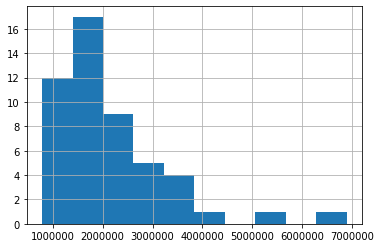

In [18]:
df[df['zipcode'] == 98039]['price'].hist()

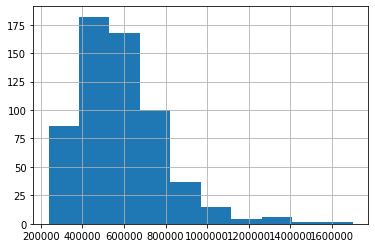

In [19]:
df[df['zipcode'] == 98103]['price'].hist()

In [20]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_month,date_year,age
id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1,0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,10,2014,65
6414100192,538000.0,3,2.25,2570,7242,2,0,0,3,7,...,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014,29
5631500400,180000.0,2,1.00,770,10000,1,0,0,3,6,...,1933,0,98028,47.7379,-122.233,2720,8062,2,2015,87
2487200875,604000.0,4,3.00,1960,5000,1,0,0,5,7,...,1965,0,98136,47.5208,-122.393,1360,5000,12,2014,55
1954400510,510000.0,3,2.00,1680,8080,1,0,0,3,8,...,1987,0,98074,47.6168,-122.045,1800,7503,2,2015,33


In [27]:
waterfront_polyline = []
    
for polygon_id in h_list:
        waterfront_polyline.append(d[polygon_id]['polygon'])

coordinates_list = []

for j in range(len(h_list)):
    
    df_test= pd.DataFrame(waterfront_polyline[j])
    
    coordinates = []
    
    for i in range(len(df_test)):

        coordinates.append((df_test[1].iloc[i],df_test[0].iloc[i]))

    coordinates_list.append(coordinates)

coordinates_list

NameError: name 'h_list' is not defined

In [21]:
# from folium import plugins
# from folium.plugins import HeatMap

# x_start = (df['lat'].max() + df['lat'].min()) / 2
# y_start = (df['long'].max() + df['long'].min()) / 2
# start_coord = (x_start, y_start)

# #You can pick one of these toners to have a different effect on the map.
# tiles=['Stamen Terrain','Stamen Toner']


# map = folium.Map(location=start_coord, zoom_start=10,tiles=tiles[0])

# lat = list(df.lat)
# lon = list(df.long)
# price = list(df.price)
# max_price =max(price)

# colormap = cm.LinearColormap(
#     colors=['white','yellow','orange','red','darkred'], 
#     index=[0,min(price),600000,1000000,max(price)],
#     vmin=0,vmax=max(price))


# #Create a map of the area
# base_map = folium.Map([x_start, y_start], zoom_start=13)



# # List comprehension to make out list of lists
# for loc, p in zip(zip(lat, lon), price):
#     folium.Circle(
#         location=loc,
#         radius=0.5,
#         fill=True,
#         color=colormap(p),
#         fill_opacity=2
#     ).add_to(map)

    
# points_a =df['coordinates']
   
# folium.PolyLine(points_a, color="green", weight=2, opacity=1).add_to(map)

# map.add_child(colormap)

# display(map)

KeyError: 'coordinates'

In [22]:
def distance_from_coast(lon,lat,resolution='l',degree_in_km=111.12):
    plt.ioff()

    m = Basemap(projection='robin',lon_0=0,resolution=resolution)
    coast = m.drawcoastlines()

    coordinates = np.vstack(coast.get_segments())
    lons,lats = m(coordinates[:,0],coordinates[:,1],inverse=True)

    dists = np.sqrt((lons-lon)**2+(lats-lat)**2)

    if np.min(dists)*degree_in_km<1:
      return True
    else:
      return False

In [23]:
from folium.plugins import HeatMap

def property_map(dataframe):
    x_start = (dataframe['lat'].max() + dataframe['lat'].min()) / 2
    y_start = (dataframe['long'].max() + dataframe['long'].min()) / 2
    start_coord = (x_start, y_start)

    #You can pick one of these toners to have a different effect on the map.
    tiles=['Stamen Terrain','Stamen Toner']

    map = folium.Map(location=start_coord, zoom_start=10,tiles=tiles[0])

    lat = list(dataframe.lat)
    lon = list(dataframe.long)
    price = list(dataframe.price)
    max_price =max(price)

    colormap = cm.LinearColormap(
        colors=['white','yellow','orange','red','darkred'], 
        index=[0,min(price),600000,1000000,max(price)],
        vmin=0,vmax=max(price))


    #Create a map of the area
    base_map = folium.Map([x_start, y_start], zoom_start=13)



    # List comprehension to make out list of lists
    for loc, p in zip(zip(lat, lon), price):
        folium.Circle(
            location=loc,
            radius=0.5,
            fill=True,
            color=colormap(p),
            fill_opacity=2
        ).add_to(map)

    map.add_child(colormap)

    display(map)

In [24]:
property_map(df[df['waterfront']==1])

In [25]:
df['waterfront'].value_counts()

0    21451
1      146
Name: waterfront, dtype: int64

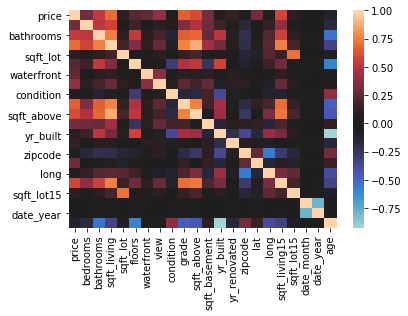

In [26]:
sns.heatmap(df.corr(), center=0);

In [ ]:
df_corr=df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))

# set index to pairs
df_corr.set_index(['pairs'], inplace = True)

#d rop level columns
df_corr.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_corr.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df_corr.drop_duplicates(inplace=True)

df_corr[(df_corr.cc>.75) & (df_corr.cc <1)]

In [ ]:
plt.scatter(df['sqft_living'],df['price'])

In [ ]:
kings_country_zip_code_data_url ='https://opendata.arcgis.com/datasets/83fc2e72903343aabff6de8cb445b81c_2.geojson'

In [ ]:
import gmaps
import gmaps.geojson_geometries

In [ ]:
gmaps.configure(api_key = 'AI')

In [ ]:
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')

In [ ]:
fig = gmaps.figure()

gini_layer = gmaps.geojson_layer(countries_geojson)

fig.add_layer(gini_layer)
fig

In [ ]:
lat_min = df['lat'].min()
lat_max = df['lat'].max()
long_min = df['long'].min()
lat_max = df['lat'].max()

def map_scale(axis_data):
    axis_min = axis_data.min()
    axis_max = axis_data.max()
    
    scale_range = axis_max - axis_min
    
    #Add 5% to either side of scale:
    axis_min = axis_min - scale_range * 0.01
    axis_max = axis_max + scale_range * 0.01    
    
    return axis_min, axis_max


In [ ]:
(lat_min, lat_max) = map_scale(df['lat'])
(long_min, long_max) = map_scale(df['long'])

print(lat_min)
print(long_min)

In [30]:
def read_ascii_boundary(filestem):
    '''
    Reads polygon data from an ASCII boundary file.
    Returns a dictionary with polygon IDs for keys. The value for each
    key is another dictionary with three keys:
    'name' - the name of the polygon
    'polygon' - list of (longitude, latitude) pairs defining the main
    polygon boundary
    'exclusions' - list of lists of (lon, lat) pairs for any exclusions in
    the main polygon
    '''
    metadata_file = filestem + 'a.dat'
    data_file = filestem + '.dat'
    # Read metadata
    lines = [line.strip().strip('"') for line in open(metadata_file)]
    polygon_ids = lines[::6]
    polygon_names = lines[2::6]
    polygon_data = {}
    for polygon_id, polygon_name in zip(polygon_ids, polygon_names):
        # Initialize entry with name of polygon.
        # In this case the polygon_name will be the 5-digit ZIP code.
        polygon_data[polygon_id] = {'name': polygon_name}
    del polygon_data['0']
    # Read lon and lat.
    f = open(data_file)
    for line in f:
        fields = line.split()
        if len(fields) == 3:
            # Initialize new polygon
            polygon_id = fields[0]
            polygon_data[polygon_id]['polygon'] = []
            polygon_data[polygon_id]['exclusions'] = []
        elif len(fields) == 1:
            # -99999 denotes the start of a new sub-polygon
            if fields[0] == '-99999':
                polygon_data[polygon_id]['exclusions'].append([])
        else:
            # Add lon/lat pair to main polygon or exclusion
            lon = float(fields[0])
            lat = float(fields[1])
            if polygon_data[polygon_id]['exclusions']:
                polygon_data[polygon_id]['exclusions'][-1].append((lon, lat))
            else:
                polygon_data[polygon_id]['polygon'].append((lon, lat))
    return polygon_data

In [31]:
# Read in ZIP code boundaries for Seattle
d = read_ascii_boundary('zt53_d00_ascii/zt53_d00')
len(d)

962

In [ ]:
zipcode_mean_data = df.groupby(['zipcode'])['price'].mean()

In [ ]:
zipcode_str = []
for zipcode in zipcode_mean_data.keys():
    zipcode_str.append(str(zipcode))

In [ ]:
delete_zip = []
for polygon_id in d:
    if d[polygon_id]['name'] not in zipcode_str:
        delete_zip.append(polygon_id)

In [ ]:
kings_county = [d.pop(key) for key in delete_zip]


In [ ]:
print(h_list)

In [ ]:
h_list = []
for number in d:
    if d[number]['name'][-2:] == 'HH':
        h_list.append(number)


# h_list = h_list[35:37]      
h_list=['379','324','325']
h_list_dict = {}

for x in h_list:
    h_list_dict[x] = d[x]

h_list

In [32]:
waterfront_polyline = []
    
for polygon_id in h_list:
        waterfront_polyline.append(d[polygon_id]['polygon'])

coordinates_list = []

for j in range(len(h_list)):
    
    df_test= pd.DataFrame(waterfront_polyline[j])
    
    coordinates = []
    
    for i in range(len(df_test)):

        coordinates.append((df_test[1].iloc[i],df_test[0].iloc[i]))

    coordinates_list.append(coordinates)

coordinates_list

NameError: name 'h_list' is not defined

In [33]:
coast_list = ['313', '349', '366', '415', '466', '479', '435', '462','479','499','531']

coast_list_dict = {}

for x in coast_list:
    coast_list_dict[x] = d[x]

test = coast_list_dict[coast_list[0]]['polygon']

test = pd.DataFrame(test)

test_c = []

for i in range(len(test)):

    test_c.append((test[1].iloc[i],test[0].iloc[i]))

test_c


[(47.7779303914892, -122.396422710568),
 (47.777719, -122.361541),
 (47.777719, -122.361541),
 (47.776619, -122.361441),
 (47.776519, -122.357941),
 (47.774049, -122.357639),
 (47.765119, -122.358641),
 (47.756019, -122.35864),
 (47.753736, -122.359405),
 (47.750272, -122.356117),
 (47.749719, -122.355036),
 (47.744919, -122.35584),
 (47.744919, -122.35874),
 (47.744319, -122.35884),
 (47.741319, -122.35884),
 (47.741319, -122.35584),
 (47.737519, -122.35574),
 (47.734019, -122.35574),
 (47.732219, -122.35834),
 (47.70152, -122.357839),
 (47.70152, -122.357839),
 (47.701519, -122.37664),
 (47.700419, -122.37664),
 (47.699619, -122.37754),
 (47.699619, -122.38054),
 (47.699719, -122.38284),
 (47.701119, -122.38294),
 (47.701744, -122.391733),
 (47.7009213399414, -122.3938398273),
 (47.7009213399414, -122.3938398273),
 (47.701602, -122.393248),
 (47.7021551547685, -122.392305495507),
 (47.7045751022994, -122.388182216542),
 (47.709119, -122.38044),
 (47.716519, -122.37644),
 (47.729219, 

In [ ]:
polyline_a = [
    (47.702203, -122.390744),
    (47.699568, -122.397625),
    (47.696744, -122.403276), 
    (47.693314, -122.406297),
    (47.689777, -122.403388),
    (47.686727, -122.403611),
    (47.682772, -122.404059),
    (47.679835, -122.406073),
    (47.676972, -122.407863),
    (47.676294, -122.410045),
    (47.672564, -122.407024)
    
]


In [53]:
a_test = pd.DataFrame(green_lake)
a_test

a_test.to_csv('coastal_coordinates/coastal_geometry_18.csv')

In [ ]:
df_testing = pd.read_csv('coastal_coordinates/coastal_geometry_01.csv') 


In [ ]:
polyline_b = [(47.6685855671642, -122.419809656716),
 (47.670219, -122.417541),
 (47.671519, -122.412941),
 (47.671719, -122.40904),
 (47.669519, -122.40774),
 (47.667719, -122.40814),
 (47.666619, -122.40744),
 (47.66302, -122.39094),
 (47.66092, -122.384639),
 (47.65892, -122.382339),
 (47.65682, -122.382839)]
             
polyline_c = [(47.633371, -122.385797),
 (47.6316055007817, -122.385761102603),
 (47.6316055007817, -122.385761102603),
 (47.63172, -122.386039),
 (47.63102, -122.393739),
 (47.63392, -122.40424),
 (47.639766, -122.414645),
 (47.6441659745756, -122.41813594208),
 (47.658919, -122.429841),
 (47.6685855671642, -122.419809656716)]

In [ ]:
polyline_d = [(47.5608001080623, -122.404871612916),
 (47.5608001080623, -122.404871612916),
 (47.561365446012, -122.405217461414),
 (47.56892, -122.409839),
 (47.57602, -122.421139),
 (47.5779130188679, -122.416514283019),
 (47.58392, -122.401839),
 (47.59572, -122.387139),
 (47.5892498567045, -122.379945040503),
 (47.5879529870275, -122.378503089761),
 (47.5865518890998, -122.376945250733)]

In [ ]:
polyline_e = [(47.3588752005092, -122.52603515084),
 (47.360854, -122.52555),
 (47.365653, -122.523414),
 (47.366332, -122.522697),
 (47.367934, -122.517859),
 (47.369475, -122.516074),
 (47.377616, -122.514854),
 (47.381896, -122.517692),
 (47.385627, -122.5223),
 (47.390586, -122.525916),
 (47.393866, -122.527123),
 (47.398573, -122.527046),
 (47.399244, -122.526619),
 (47.399389, -122.525627),
 (47.402923, -122.520287),
 (47.404983, -122.522469),
 (47.408034, -122.520836),
 (47.412116, -122.516563),
 (47.416366, -122.514061),
 (47.420302, -122.51313),
 (47.433166, -122.512245),
 (47.439993, -122.51458),
 (47.453528, -122.512276),
 (47.461196, -122.508278),
 (47.461791, -122.505928),
 (47.463416, -122.503716),
 (47.469527, -122.498863),
 (47.474143, -122.497719),
 (47.475669, -122.49836),
 (47.478103, -122.492592),
 (47.480086, -122.484398),
 (47.483878, -122.480476),
 (47.489265, -122.480248),
 (47.495284, -122.479225),
 (47.505553, -122.476631),
 (47.510116, -122.476769),
 (47.510985, -122.474983),
 (47.5110397963053, -122.474512412635),
 (47.5110397963053, -122.474512412635),
 (47.5102986770083, -122.469919609554),
 (47.509956, -122.467796),
 (47.509372640219, -122.466410959052),
 (47.5037820565226, -122.453137525409),
 (47.503471, -122.452399),
 (47.5033753796701, -122.452488090268),
 (47.5015119207387, -122.45422429068),
 (47.494773, -122.460503),
 (47.4869456026941, -122.460034068463),
 (47.486861, -122.460029),
 (47.4867804621036, -122.459923974736),
 (47.4820968580711, -122.453816331339),
 (47.4756728134716, -122.445439070301),
 (47.4680446964076, -122.43549164125),
 (47.46643, -122.433386),
 (47.4586989915642, -122.439363707972),
 (47.458083, -122.43984),
 (47.4490086092222, -122.43989453252),
 (47.4372254867355, -122.439965343153),
 (47.4368848908674, -122.439967389962),
 (47.417647, -122.440083),
 (47.4146881306157, -122.439380836533),
 (47.407424, -122.437657),
 (47.402129, -122.427327),
 (47.4004753074058, -122.408613949126),
 (47.399277, -122.395054),
 (47.3938661091422, -122.384074898132),
 (47.388718, -122.373629),
 (47.38533, -122.378482),
 (47.381325, -122.401768),
 (47.3767970850653, -122.412150401206),
 (47.3736737500037, -122.419312134185),
 (47.370104181885, -122.427497068945),
 (47.365607, -122.437809),
 (47.354987, -122.448399),
 (47.3436380453385, -122.453853317352),
 (47.343337, -122.453998),
 (47.3430318521321, -122.45538345058),
 (47.342567, -122.457494),
 (47.34452540556, -122.46912346181),
 (47.344623, -122.469703),
 (47.335172, -122.491237),
 (47.3343798346397, -122.491186786239),
 (47.3327373175738, -122.491082670404),
 (47.332427, -122.491063),
 (47.3322242239721, -122.491255142878),
 (47.3305794595466, -122.492813659307),
 (47.330253, -122.493123),
 (47.3302668561355, -122.493505747349),
 (47.3306304292164, -122.503548708681),
 (47.33068, -122.504918),
 (47.33332, -122.51885),
 (47.3375858203245, -122.523335446717),
 (47.33837, -122.52416),
 (47.3396864538621, -122.524888528357),
 (47.345542, -122.528129),
 (47.3588752005092, -122.52603515084)]

In [ ]:
polyline_f =[(47.4069209999996, -122.333926307692),
 (47.4069209999996, -122.333926307692),
 (47.408421, -122.335234),
 (47.415921, -122.348035),
 (47.4333397192118, -122.352791650246),
 (47.441921, -122.355135),
 (47.4452214446258, -122.362025980963),
 (47.447621, -122.367036),
 (47.450521, -122.383136),
 (47.4576268197837, -122.37080291049),
 (47.459221, -122.368036),
 (47.481421, -122.361336),
 (47.48842, -122.365236)]

In [ ]:
polyline_g = [(47.5123453748548, -122.394348641264),
 (47.5123453748548, -122.394348641264),
 (47.51522, -122.396538),
 (47.52482, -122.393938),
 (47.55012, -122.398338),
              (47.560621, -122.404619)]


In [ ]:
polyline_h = [(47.486689, -122.361497),
 (47.48882, -122.364836),
 (47.48842, -122.365236),
 (47.48842, -122.365236),
 (47.50222, -122.386637),
 (47.5123453748548, -122.394348641264),
 (47.5123453748548, -122.394348641264),
 (47.51522, -122.395538),
 (47.51532, -122.395138)]

In [ ]:
polyline_i =[(47.4069209999996, -122.333926307692),
 (47.4069209999996, -122.333926307692),
 (47.408421, -122.335234),
 (47.415921, -122.348035),
 (47.4333397192118, -122.352791650246),
 (47.441921, -122.355135),
 (47.4452214446258, -122.362025980963),
 (47.447621, -122.367036),
 (47.450521, -122.383136),
 (47.4576268197837, -122.37080291049),
 (47.459221, -122.368036),
 (47.481421, -122.361336),
 (47.48842, -122.365236)]

In [ ]:
polyline_j=[(47.342021, -122.334234),
 (47.3430441549655, -122.334167549544),
 (47.3430441549655, -122.334167549544),
 (47.348521, -122.324833),
 (47.3669785675071, -122.325219750426),
 (47.372431099889, -122.325334),
 (47.3787947178715, -122.325467339995),
 (47.391521, -122.325734),
 (47.400621, -122.328434),
 (47.4069209999996, -122.333926307692),
 (47.4069209999996, -122.333926307692)]

In [ ]:
polyline_k = [(47.3208014993381, -122.41760782532),
 (47.3208014993381, -122.41760782532),
 (47.3208143947873, -122.41756234266),
 (47.3268291263337, -122.396348192963),
 (47.3270993368678, -122.395395151804),
 (47.3339082594189, -122.371379865143),
 (47.3359068612015, -122.364330733011),
 (47.335953, -122.364168),
 (47.341421, -122.336934),
 (47.3430441549655, -122.334167549544)]

In [ ]:
polyline_l= [(47.653521, -122.091933),
 (47.650021, -122.090133),
 (47.642322, -122.082233),
 (47.636122, -122.074232),
 (47.633422, -122.072032),
 (47.626622, -122.070932),
 (47.617222, -122.068232),
 (47.613022, -122.069432),
 (47.610222, -122.072832),
 (47.603806, -122.079053),
 (47.603806, -122.079053),
 (47.602922, -122.081132),
 (47.601522, -122.081832),
 (47.599922, -122.080732),
 (47.597222, -122.082332),
 (47.595622, -122.085032),
 (47.591822, -122.088132),
 (47.591122, -122.088132),
 (47.583922, -122.084332),
 (47.570222, -122.067931),
 (47.568822, -122.064231),
 (47.568422, -122.059931),
 (47.566722, -122.055731),
 (47.565222, -122.054931),
 (47.562322, -122.057431),
 (47.563122, -122.063731),
 (47.561722, -122.064831),
 (47.561722, -122.064831),
 (47.559122, -122.066431),
 (47.557722, -122.068231),
 (47.555522, -122.074931),
 (47.555722, -122.077131),
 (47.558722, -122.079631),
 (47.560922, -122.079831),
 (47.568122, -122.082931),
 (47.570322, -122.086631),
 (47.571722, -122.092331),
 (47.571822, -122.096732),
 (47.573622, -122.107332),
 (47.575282, -122.109763),
 (47.575282, -122.109763),
 (47.576422, -122.111432),
 (47.580022, -122.112032),
 (47.582722, -122.110332),
 (47.592022, -122.110532),
 (47.599922, -122.108632),
 (47.600622, -122.109832),
 (47.605322, -122.111732),
 (47.611722, -122.107632),
 (47.613622, -122.103532),
 (47.618422, -122.097032),
 (47.619922, -122.092932),
 (47.625322, -122.087532),
 (47.627322, -122.086932),
 (47.627322, -122.086932),
 (47.631022, -122.086832),
 (47.633122, -122.087532),
 (47.636821, -122.092133),
 (47.640921, -122.099433),
 (47.644921, -122.104333),
 (47.650021, -122.107033),
 (47.652521, -122.107633),
 (47.655721, -122.098233),
 (47.655221, -122.093633),
 (47.653521, -122.091933)]



In [ ]:
polyline_m= [(47.75642, -122.262437),
 (47.75622, -122.257737),
 (47.75742, -122.254737),
 (47.75582, -122.257237),
 (47.75462, -122.255537),
 (47.75432, -122.249936),
 (47.75422, -122.252536),
 (47.75262, -122.255136),
 (47.75172, -122.258337),
 (47.75022, -122.258236),
 (47.74552, -122.263537),
 (47.73872, -122.266137),
 (47.73832, -122.267337),
 (47.73772, -122.267437),
 (47.73422, -122.265036),
 (47.73422, -122.265036),
 (47.72672, -122.261636),
 (47.71902, -122.259636),
 (47.71402, -122.257736),
 (47.70392, -122.246136),
 (47.70102, -122.245036),
 (47.69932, -122.240935),
 (47.69712, -122.231235),
 (47.697577, -122.227259),
 (47.69938, -122.225709),
 (47.700029, -122.22656),
 (47.70392, -122.218135),
 (47.703257, -122.214481),
 (47.702623, -122.213049),
 (47.701364, -122.211939),
 (47.701364, -122.211939),
 (47.70042, -122.210335),
 (47.698623, -122.211367),
 (47.69762, -122.212735),
 (47.69812, -122.213635),
 (47.69502, -122.217035),
 (47.69332, -122.217835),
 (47.69102, -122.218035),
 (47.68552, -122.216935),
 (47.68092, -122.214735),
 (47.677967, -122.212383),
 (47.67522, -122.209335),
 (47.67502, -122.208335),
 (47.67302, -122.206635),
 (47.669821, -122.207235),
 (47.667521, -122.208235),
 (47.661221, -122.208535),
 (47.654221, -122.207334),
 (47.650221, -122.205234),
 (47.648821, -122.206534),
 (47.648821, -122.206534),
 (47.648621, -122.211334),
 (47.652121, -122.212934),
 (47.652921, -122.215335),
 (47.651921, -122.218235),
 (47.650228, -122.22005),
 (47.64729, -122.22137),
 (47.641271, -122.222445),
 (47.640821, -122.223334),
 (47.640921, -122.226935),
 (47.65162, -122.228735),
 (47.65192, -122.230235),
 (47.64972, -122.232035),
 (47.640221, -122.231535),
 (47.639267, -122.23046),
 (47.639267, -122.23046),
 (47.639421, -122.232635),
 (47.64592, -122.239435),
 (47.64472, -122.240835),
 (47.63772, -122.242535),
 (47.630121, -122.242135),
 (47.619921, -122.242934),
 (47.615121, -122.239034),
 (47.613921, -122.236034),
 (47.614021, -122.231034),
 (47.607921, -122.223734),
 (47.615521, -122.220834),
 (47.615521, -122.220834),
 (47.610021, -122.209534),
 (47.607921, -122.207034),
 (47.606621, -122.207734),
 (47.608621, -122.214934),
 (47.602921, -122.215134),
 (47.599921, -122.210534),
 (47.597021, -122.209934),
 (47.586921, -122.206233),
 (47.581921, -122.203333),
 (47.578621, -122.196733),
 (47.578121, -122.191433),
 (47.578321, -122.189433),
 (47.579211, -122.187926),
 (47.579211, -122.187926),
 (47.572521, -122.190233),
 (47.570321, -122.187433),
 (47.568221, -122.186733),
 (47.568221, -122.189433),
 (47.568721, -122.190833),
 (47.569741415918, -122.191871782422),
 (47.570521, -122.191833),
 (47.571321, -122.189933),
 (47.572021, -122.190833),
 (47.571121, -122.193433),
 (47.5685615282227, -122.192915215039),
 (47.562521, -122.188933),
 (47.553721, -122.194533),
 (47.552721, -122.197233),
 (47.545721, -122.196733),
 (47.545721, -122.196733),
 (47.538521, -122.196533),
 (47.530021, -122.205533),
 (47.528221, -122.204633),
 (47.518421, -122.212033),
 (47.514221, -122.206632),
 (47.508522, -122.203332),
 (47.505227, -122.202392),
 (47.504609, -122.202804),
 (47.504402, -122.203994),
 (47.504402, -122.203994),
 (47.500922, -122.211032),
 (47.500321, -122.216232),
 (47.500321, -122.216232)]

In [ ]:
polyline_n= [(47.500321, -122.216232),
 (47.500321, -122.216232),
 (47.500321, -122.218633),
 (47.500321, -122.218633),
 (47.509521, -122.236233),
 (47.51342, -122.248155),
 (47.51342, -122.248155),
 (47.51484, -122.251968),
 (47.518212, -122.255471),
 (47.52037, -122.260426),
 (47.528521, -122.260734),
 (47.529421, -122.263034),
 (47.534221, -122.264034),
 (47.545221, -122.257534),
 (47.547521, -122.258134),
 (47.548321, -122.257434),
 (47.548721, -122.251734),
 (47.551221, -122.247534),
 (47.554021, -122.246034),
 (47.562221, -122.250734),
 (47.561621, -122.255734),
 (47.553921, -122.254634),
 (47.551721, -122.257334),
 (47.551421, -122.259434),
 (47.560521, -122.263834),
 (47.564621, -122.266834),
 (47.567721, -122.269935),
 (47.570521, -122.276435),
 (47.570506, -122.278637),
 (47.570506, -122.278637),
 (47.580721, -122.283935),
 (47.58332, -122.287235),
 (47.58772, -122.285335),
 (47.58982, -122.285335),
 (47.59292, -122.287035),
 (47.59562, -122.286935),
 (47.60022, -122.285135),
 (47.60152, -122.284135),
 (47.60152, -122.284135),
 (47.616754, -122.280154),
 (47.616754, -122.280154),
 (47.62162, -122.280436),
 (47.62272, -122.282436),
 (47.62552, -122.281736),
 (47.63082, -122.276736),
 (47.63682, -122.276136),
 (47.64122, -122.276236),
 (47.641885, -122.276761),
 (47.642618, -122.283468),
 (47.64362, -122.287836),
 (47.64612, -122.287136),
 (47.64702, -122.290436),
 (47.64692, -122.309037),
 (47.64532, -122.309037),
 (47.64402, -122.306737),
 (47.64342, -122.310837),
 (47.64372, -122.313437),
 (47.64372, -122.313437),
 (47.64682, -122.315237),
 (47.65232, -122.320337),
 (47.65242, -122.322237),
 (47.64812, -122.326037),
 (47.643338, -122.328977),
 (47.638396, -122.330191),
 (47.63672, -122.330137),
 (47.63672, -122.330137),
 (47.63432, -122.330437),
 (47.63252, -122.327637),
 (47.63052, -122.329637),
 (47.62642, -122.338137),
 (47.62862, -122.339638),
 (47.63242, -122.339238),
 (47.63802, -122.339438),
 (47.64592, -122.347038),
 (47.65032, -122.356438),
 (47.65032, -122.356438),
 (47.65672, -122.371172333333),
 (47.657462, -122.377081),
 (47.655911, -122.377047),
 (47.655751, -122.380121),
 (47.655751, -122.380121),
 (47.65562, -122.382339),
 (47.65682, -122.382839),
 (47.65892, -122.382339),
 (47.66092, -122.384639),
 (47.66302, -122.39094),
 (47.666619, -122.40744),
 (47.667719, -122.40814),
 (47.669519, -122.40774),
 (47.671719, -122.40904),
 (47.671519, -122.412941),
 (47.670219, -122.417541),
 (47.6685855671642, -122.419809656716),
 (47.6685855671642, -122.419809656716)]

In [ ]:
polyline_o= [(47.6759603238834, -122.412156607291),
 (47.6759603238834, -122.412156607291),
 (47.672719, -122.40734),
 (47.670019, -122.40574),
 (47.667719, -122.40364),
 (47.667719, -122.40364),
 (47.665419, -122.39924),
 (47.664719, -122.39484),
 (47.665919, -122.39344),
 (47.666719, -122.39084),
 (47.66652, -122.38744),
 (47.661125, -122.379889),
 (47.66082, -122.371739),
 (47.65672, -122.366539),
 (47.65012, -122.354338),
 (47.65012, -122.354338),
 (47.64762, -122.348238),
 (47.64862, -122.347038),
 (47.64792, -122.341738),
 (47.64622, -122.338138),
 (47.64566, -122.338049),
 (47.644479, -122.334826),
 (47.64507, -122.333258),
 (47.651615, -122.328625),
 (47.65322, -122.326537),
 (47.65322, -122.326537),
 (47.65372, -122.319337),
 (47.65172, -122.314737),
 (47.65032, -122.314137),
 (47.64752, -122.309037),
 (47.64742, -122.300237),
 (47.64922, -122.297136),
 (47.65002, -122.297236),
 (47.65182, -122.295636),
 (47.65382, -122.292236),
 (47.65452, -122.286636),
 (47.65412, -122.284036),
 (47.65312, -122.281836),
 (47.65152, -122.281436),
 (47.64802, -122.277436),
 (47.64782, -122.275736),
 (47.65262, -122.275536),
 (47.65772, -122.269036),
 (47.66472, -122.266736),
 (47.66652, -122.259635),
 (47.671386, -122.253116),
 (47.671386, -122.253116),
 (47.68072, -122.245035),
 (47.68262, -122.244935),
 (47.68542, -122.247035),
 (47.68752, -122.253035),
 (47.68822, -122.257636),
 (47.68792, -122.262536),
 (47.69362, -122.270836),
 (47.69462, -122.271836),
 (47.69732, -122.272336),
 (47.69732, -122.272336),
 (47.71892, -122.278037),
 (47.72022, -122.279437),
 (47.73102, -122.281337),
 (47.73332, -122.283337),
 (47.73332, -122.283337),
 (47.73692, -122.285737),
 (47.74432, -122.283637),
 (47.74772, -122.281837),
 (47.74902, -122.278237),
 (47.75112, -122.275137),
 (47.75282, -122.274537),
 (47.75642, -122.269537),
 (47.75722, -122.265237),
 (47.75642, -122.262437)]


In [45]:
polyline_p=[(47.701744, -122.391733),
 (47.7009213399414, -122.3938398273),
 (47.7009213399414, -122.3938398273),
 (47.701602, -122.393248),
 (47.7021551547685, -122.392305495507),
 (47.7045751022994, -122.388182216542),
 (47.709119, -122.38044),
 (47.716519, -122.37644),
 (47.729219, -122.37314),
 (47.749119, -122.382641),
 (47.758519, -122.380241),
 (47.7662549769275, -122.388259876522),
 (47.772219, -122.394442),
 (47.7779275945007, -122.396421740573),
 (47.7779303914892, -122.396422710568)]

In [47]:
polyline_full = polyline_a + polyline_b

NameError: name 'polyline_a' is not defined

In [42]:
from folium import plugins
from folium.plugins import HeatMap

x_start = (df['lat'].max() + df['lat'].min()) / 2
y_start = (df['long'].max() + df['long'].min()) / 2
start_coord = (x_start, y_start)

#You can pick one of these toners to have a different effect on the map.
tiles=['Stamen Terrain','Stamen Toner']


map = folium.Map(location=start_coord, zoom_start=10,tiles=tiles[0])

lat = list(df.lat)
lon = list(df.long)
price = list(df.price)
max_price =max(price)

colormap = cm.LinearColormap(
    colors=['white','yellow','orange','red','darkred'], 
    index=[0,min(price),600000,1000000,max(price)],
    vmin=0,vmax=max(price))


#Create a map of the area
base_map = folium.Map([x_start, y_start], zoom_start=13)



# List comprehension to make out list of lists
# for loc, p in zip(zip(lat, lon), price):
#     folium.Circle(
#         location=loc,
#         radius=0.5,
#         fill=True,
#         color=colormap(p),
#         fill_opacity=2
#     ).add_to(map)


# for polygons in range(len(h_list)):
    
#     points_a = coordinates_list[polygons]

#     folium.PolyLine(points_a, color="darkblue", weight=2, opacity=1).add_to(map)



points_a = test_c[-15:]

folium.PolyLine(points_a, color="red", weight=2, opacity=1).add_to(map)


map.add_child(colormap)

display(map)

In [ ]:
# Group the data for mean price by ZIP code in Kings county
zipcode_mean_data = df.groupby(['zipcode'])['price'].mean()

mean_price_max = zipcode_mean_data.max()

# Create figure and two axes: one to hold the map and one to hold
# the colorbar

figure(figsize=(7, 5), dpi=100)
map_axis = axes([0.0, 0.0, 0.8, 0.9])
cb_axis = axes([0.83, 0.1, 0.03, 0.6])

# Define colormap to color the ZIP codes.
# You can try changing this to cm.Blues or any other colormap
# to get a different effect
cmap_blue = LinearSegmentedColormap.from_list('my_list',[(0,0,1),
                                                    (0,0,1),
                                                    (0,0,1)], N=100)

# Create the map axis
axes(map_axis)
axis([-122.7, -121.2, 46.9 , 48])
gca().set_axis_off()

cmap_blue = LinearSegmentedColormap.from_list('my_list',[(1,1,1),
                                                    (0,0,1)], N=100)
i=0
# Loop over the ZIP codes in the boundary file
for polygon_id in h_list_dict:
    i+=1
    polygon_data = array(h_list_dict[polygon_id]['polygon'])
    zipcode = h_list_dict[polygon_id]['name']
    # Define the color for the ZIP code
    fc = cmap_blue( i / len(h_list_dict))
    # Draw the ZIP code
    patch = Polygon(array(polygon_data), facecolor=fc,
        edgecolor=(.3, .3, .3, 1), linewidth=.2)
    gca().add_patch(patch)
title('Average Sale Price per ZIP Code in Kings County')

# Draw colorbar
cb = mpl.colorbar.ColorbarBase(cb_axis, cmap=cmap_blue,
    norm = mpl.colors.Normalize(vmin=0, vmax=len(h_list_dict)))
cb.set_label('Average Price')

# Change all fonts to Arial
for o in gcf().findobj(matplotlib.text.Text):
    o.set_fontname('Arial')

# Export figure to bitmap
#savefig('../images/ca_births.png')

In [ ]:
# Group the data for mean price by ZIP code in Kings county
zipcode_mean_data = df.groupby(['zipcode'])['price'].mean()

mean_price_max = zipcode_mean_data.max()

# Create figure and two axes: one to hold the map and one to hold
# the colorbar

figure(figsize=(7, 5), dpi=100)
map_axis = axes([0.0, 0.0, 0.8, 0.9])
cb_axis = axes([0.83, 0.1, 0.03, 0.6])

# Define colormap to color the ZIP codes.
# You can try changing this to cm.Blues or any other colormap
# to get a different effect
cmap = LinearSegmentedColormap.from_list('my_list',[(243/255,237/255,195/255),
                                                    (240/255,164/255,77/255),
                                                    (1,0,0)], N=100)

cmap_blue = LinearSegmentedColormap.from_list('my_list',[(0,0,1),
                                                    (0,0,1)], N=100)

# Create the map axis
axes(map_axis)
axis([-122.7, -121.2, 46.9 , 48])
gca().set_axis_off()

# Loop over the ZIP codes in the boundary file
for polygon_id in d:
    polygon_data = array(d[polygon_id]['polygon'])
    zipcode = d[polygon_id]['name']
    zipcode_price = zipcode_mean_data[int(zipcode)] if zipcode in zipcode_str else 0.
    # Define the color for the ZIP code
    fc = cmap(zipcode_price / mean_price_max)
    # Draw the ZIP code
    patch = Polygon(array(polygon_data), facecolor=fc,
        edgecolor=(.3, .3, .3, 1), linewidth=.2)
    gca().add_patch(patch)

i=0    
# Loop over the ZIP codes in the boundary file
for polygon_id in h_list_dict:
    i+= 1
    polygon_data = array(h_list_dict[polygon_id]['polygon'])
    zipcode = h_list_dict[polygon_id]['name']
    zipcode_price = zipcode_mean_data[int(zipcode)] if zipcode in zipcode_str else 0.
    # Define the color for the ZIP code
    fc = cmap_blue( i / len(h_list_dict))
    # Draw the ZIP code
    patch = Polygon(array(polygon_data), facecolor=fc,
        edgecolor=(.3, .3, .3, 1), linewidth=.2)
    gca().add_patch(patch)    
    
    
    
    
    
    
    
title('Average Sale Price per ZIP Code in Kings County')

# Draw colorbar
cb = mpl.colorbar.ColorbarBase(cb_axis, cmap=cmap,
    norm = mpl.colors.Normalize(vmin=0, vmax=mean_price_max))
cb.set_label('Average Price')

# Change all fonts to Arial
for o in gcf().findobj(matplotlib.text.Text):
    o.set_fontname('Arial')

# Export figure to bitmap
#savefig('../images/ca_births.png')

In [ ]:
# Group the data for mean price by ZIP code in Kings county
zipcode_mean_data = df.groupby(['zipcode'])['price'].count()

mean_price_max = zipcode_mean_data.max()

# Create figure and two axes: one to hold the map and one to hold
# the colorbar
figure(figsize=(7, 5), dpi=100)
map_axis = axes([0.0, 0.0, 0.8, 0.9])
cb_axis = axes([0.83, 0.1, 0.03, 0.6])

# Define colormap to color the ZIP codes.
# You can try changing this to cm.Blues or any other colormap
# to get a different effect
cmap = LinearSegmentedColormap.from_list('my_list',[(243/255,237/255,195/255),
                                                    (240/255,164/255,77/255),
                                                    (1,0,0)], N=100)

# Create the map axis
axes(map_axis)
axis([-122.7, -121.2, 46.9 , 48])
gca().set_axis_off()

# Loop over the ZIP codes in the boundary file
for polygon_id in d:
    polygon_data = array(d[polygon_id]['polygon'])
    zipcode = d[polygon_id]['name']
    zipcode_price = zipcode_mean_data[int(zipcode)] if zipcode in zipcode_str else 0.
    # Define the color for the ZIP code
    fc = cmap(zipcode_price / mean_price_max)
    # Draw the ZIP code
    patch = Polygon(array(polygon_data), facecolor=fc,
        edgecolor=(.3, .3, .3, 1), linewidth=.2)
    gca().add_patch(patch)

    
points_a =[(-122.7, 46.9), (-121.2,48)] 
    
    
folium.PolyLine(points_a, color="green", weight=2.5, opacity=1).add_to(figure)




title('Number of data points per zip code in Kings County')

# Draw colorbar
cb = mpl.colorbar.ColorbarBase(cb_axis, cmap=cmap,
    norm = mpl.colors.Normalize(vmin=0, vmax=mean_price_max))
cb.set_label('House data points per zip code')

# Change all fonts to Arial
for o in gcf().findobj(matplotlib.text.Text):
    o.set_fontname('Arial')

# Export figure to bitmap
#savefig('../images/ca_births.png')

In [ ]:
coordinates = []
for i in range(len(df)):

    coordinates.append((df['lat'].iloc[i],df['long'].iloc[i]))

df['coordinates'] = coordinates

In [ ]:
most_valuable_house = df[df['price'] == df['price'].max()]
most_valuable_zipcode = df[df['zipcode'] == 98102]
most_valuable_house_location = list(most_valuable_house['coordinates'])[0]
most_valuable_house

In [ ]:
most_valuable_zipcode

In [ ]:
coordinates = []
for i in range(len(df)):

    coordinates.append((df['lat'].iloc[i],df['long'].iloc[i]))

df['coordinates'] = coordinates


In [ ]:
most_valuable_house_location

In [ ]:
from haversine import haversine, Unit

lyon = (45.7597, 4.8422) # (lat, lon)
paris = (48.8567, 2.3508)

haversine(most_valuable_house_location, most_valuable_house_location)


In [ ]:
distance = []

for i in range(len(df)):
    distance.append(haversine(most_valuable_house_location, df['coordinates'].iloc[i]))

In [ ]:
df['distance'] = distance
df

In [ ]:
plt.scatter(df['distance'],df['price'])

In [ ]:
fig = gmaps.figure(center=most_valuable_house_location, zoom_level = 11)
fig

In [48]:
island = [(47.592948, -122.253632), 
          (47.582872, -122.252978), 
          (47.575461, -122.244910), 
          (47.573724, -122.241133), 
          (47.568715, -122.233666), 
          (47.563213, -122.231434),
          (47.556031, -122.230919),
          (47.554119, -122.232979),
          (47.552381, -122.232979),
          (47.550122, -122.235726),
          (47.542475, -122.237871),
          (47.541721, -122.240961),
          (47.537491, -122.244395),
          (47.534768, -122.243193),
          (47.530885, -122.239073),
          (47.528335, -122.234095),
          (47.524568, -122.227915),
          (47.524858, -122.224482),
          (47.526439, -122.223455),
          (47.528684, -122.219278),
          (47.529778, -122.218852),
          (47.532252, -122.215698),
          (47.534324, -122.213312),
          (47.537259, -122.211351), 
          (47.539618, -122.209391),
          (47.541805, -122.209561),
          (47.543991, -122.208538),
          (47.544854, -122.209391),
          (47.546581, -122.209476),
          (47.548652, -122.209476),
          (47.552076, -122.209761),
          (47.552923, -122.210008),
          (47.553698, -122.209793),
          (47.554161, -122.209664),
          (47.554596, -122.209578),
          (47.554849, -122.209589),
          (47.555103, -122.209224),
          (47.555421, -122.208902),
          (47.555841, -122.208870),
          (47.556341, -122.209160),
          (47.556630, -122.209353),
          (47.557079, -122.209546),
          (47.557637, -122.209546),
          (47.558216, -122.209471),
          (47.559063, -122.209460),
          (47.559693, -122.209181),
          (47.560236, -122.209192),
          (47.560576, -122.209407),
          (47.561184, -122.209289),
          (47.561749, -122.209310),
          (47.562205, -122.209471),
          (47.562777, -122.209729),
          (47.563255, -122.209643),
          (47.563675, -122.209600),
          (47.564174, -122.209342),
          (47.564536, -122.208742),
          (47.564942, -122.208280),
          (47.565391, -122.207905),
          (47.565861, -122.207636),
          (47.566411, -122.207476),
          (47.566733, -122.207851),
          (47.567258, -122.208098),
          (47.567627, -122.207830),
          (47.567997, -122.207883),
          (47.568366, -122.207765),
          (47.569100, -122.207785),
          (47.569917, -122.207158),
          (47.570354, -122.205419), 
          (47.570857, -122.204511),
          (47.571630, -122.204068),
          (47.572103, -122.204090),
          (47.572781, -122.203625),
          (47.573561, -122.203474),
          (47.574137, -122.203625),
          (47.574764, -122.203280),
          (47.575303, -122.202642),
          (47.576010, -122.202167),
          (47.576586, -122.201692),
          (47.577198, -122.201540),
          (47.577854, -122.201713),
          (47.578236, -122.202847),
          (47.578367, -122.203405),
          (47.578803, -122.204286),
          (47.579314, -122.204881),
          (47.580502, -122.206105),
          (47.580903, -122.207527),
          (47.580990, -122.208833),
          (47.581037, -122.209952),
          (47.581280, -122.211025),
          (47.581623, -122.211567),
          (47.582269, -122.212006),
          (47.582417, -122.212779),
          (47.582347, -122.214037),
          (47.582604, -122.215444),
          (47.582954, -122.216206),
          (47.583838, -122.217045),
          (47.585231, -122.218593),
          (47.585117, -122.220878),
          (47.585864, -122.222346),
          (47.586578, -122.224631),
          (47.587762, -122.224222),
          (47.591007, -122.224367),
          (47.594852, -122.226484),
          (47.595112, -122.228336),
          (47.594366, -122.228913),
          (47.593635, -122.231343),
          (47.593976, -122.232185),
          (47.593571, -122.233532),
          (47.592759, -122.235000),
          (47.592419, -122.237670),
          (47.592532, -122.238970),
          (47.593376, -122.240269),
          (47.594349, -122.241279),
          (47.595339, -122.241640),
          (47.595874, -122.244112),
          (47.595710, -122.246535),
          (47.594605, -122.246745),
          (47.593479, -122.247746),
          (47.592421, -122.249182),
          (47.592376, -122.250951),
          (47.592939, -122.252386),
          (47.592948, -122.253632)]

In [52]:
green_lake = [
    (47.680721, -122.343710),
    (47.678551, -122.344728),
    (47.676001, -122.346085),
    (47.673718, -122.344445),
    (47.671738, -122.342636),
    (47.672157, -122.339132),
    (47.673680, -122.336305),
    (47.675507, -122.334609),
    (47.676382, -122.333139),
    (47.678399, -122.332009),
    (47.679533, -122.329317),
    (47.681190, -122.329317),
    (47.682509, -122.334576),
    (47.684392, -122.335975),
    (47.684656, -122.338324),
    (47.683111, -122.339331),
    (47.682019, -122.339275),
    (47.680927, -122.340338),
    (47.680249, -122.341737),
    (47.680721, -122.343710)   
]

In [ ]:
coast_line = [
    
    
    
    
    
]